<a href="https://colab.research.google.com/github/jagadeesh3093/cancer_classification/blob/main/deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import models

# Load the saved pre-trained model
model = torch.load("/content/drive/MyDrive/working/DenseNet121_approach1.keras")

# Define device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformation for test data
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Path to the directory containing test images
test_data_dir = '/content/drive/MyDrive/working/test'

# Create a dataset from the test data
test_dataset = ImageFolder(root=test_data_dir, transform=test_transform)

# Create a DataLoader for the test dataset
batch_size = 8
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Get class names
class_names = test_dataset.classes

# Move model to the appropriate device
model = model.to(device)
model.eval()

# Iterate through the DataLoader and make predictions
for inputs, labels in test_dataloader:
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

    # Print actual and predicted labels for each image in the batch
    for i in range(len(preds)):
        actual_label = class_names[labels[i]]
        predicted_label = class_names[preds[i]]
        print(f"Actual Label: {actual_label}, Predicted Label: {predicted_label}")


Mounted at /content/drive
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: normal
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual Label: benign, Predicted Label: benign
Actual L

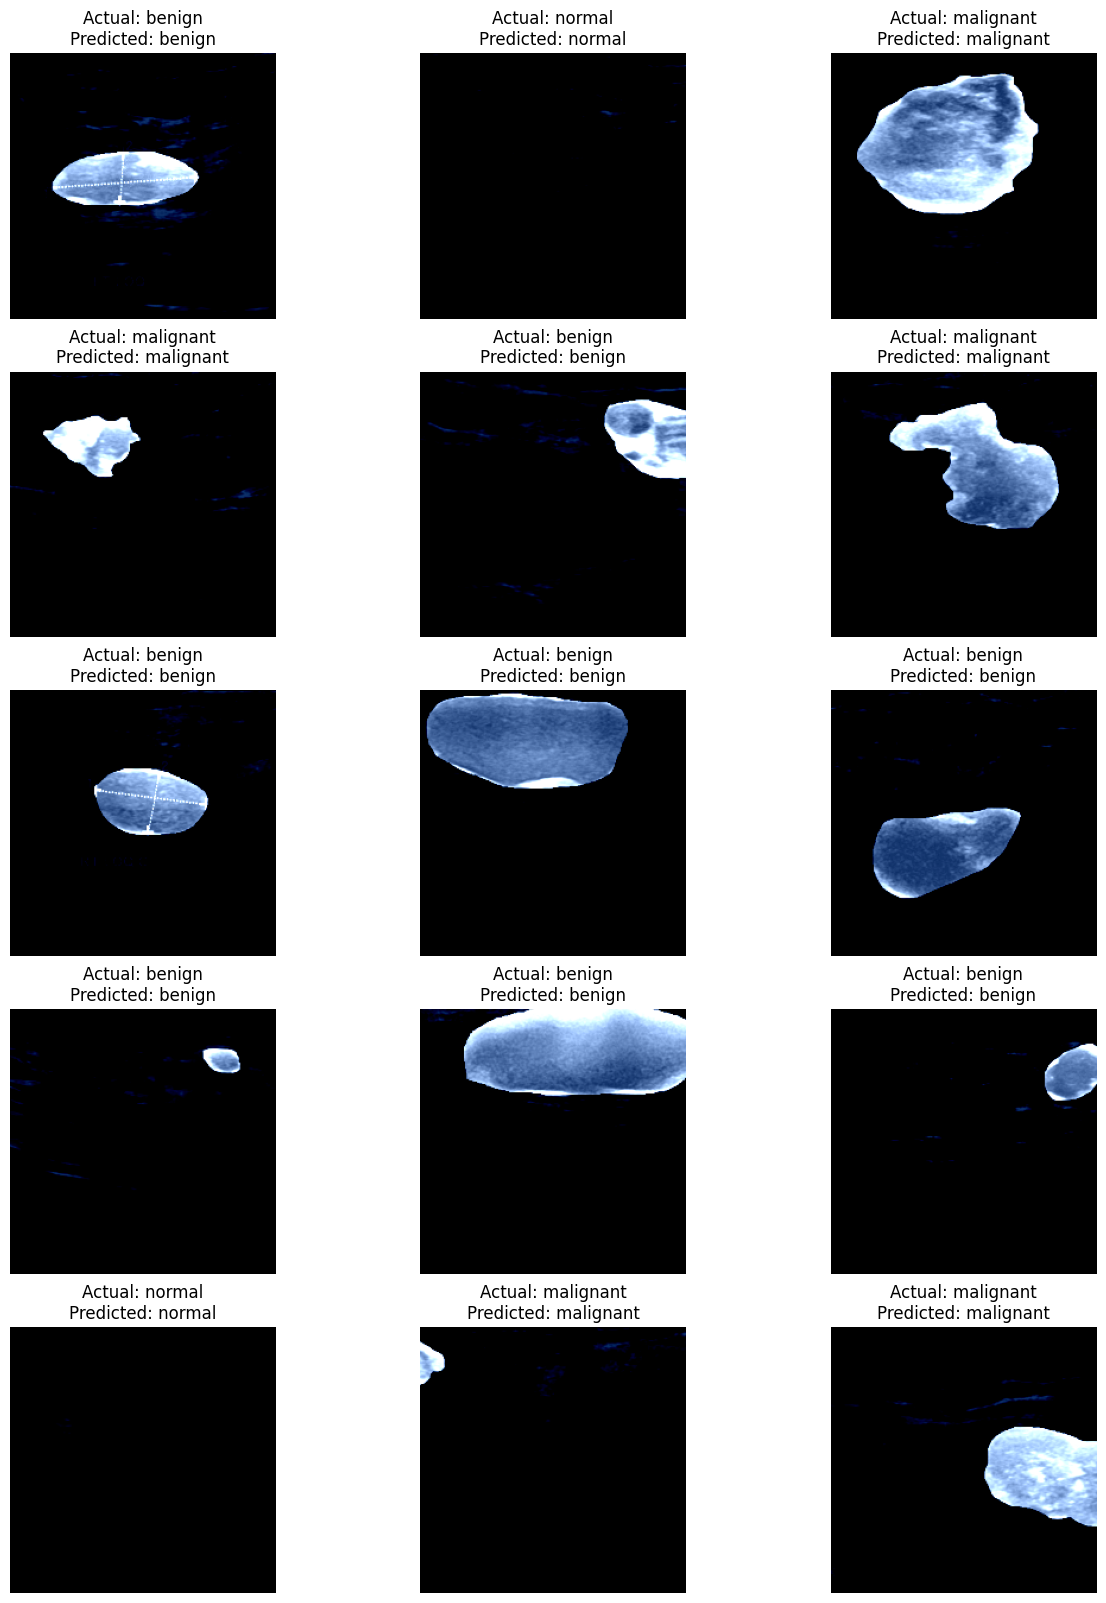

In [ ]:
# Define the necessary imports
import warnings
import os
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Define the data transformations
data_transforms = {
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Set the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the model
model = torch.load("/content/drive/MyDrive/working/DenseNet121_approach1.keras")

# Define the test dataset and dataloader
test_dataset = datasets.ImageFolder(root="/content/drive/MyDrive/working/test", transform=data_transforms['test'])
test_dataloader = DataLoader(test_dataset, batch_size=15, shuffle=True)

# Get a batch of test images and labels
inputs, labels = next(iter(test_dataloader))
inputs = inputs.to(device)
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.image")
# Perform prediction
with torch.no_grad():
    model.eval()
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)


# Display the images with their actual and predicted labels
plt.figure(figsize=(15, 20))
for i in range(15):
    ax = plt.subplot(5, 3, i + 1)
    ax.axis('off')
    ax.set_title(f'Actual: {class_names[labels[i]]}\nPredicted: {class_names[preds[i]]}')
    plt.imshow(inputs[i].cpu().numpy().transpose((1, 2, 0)))
plt.show()
